# 挑战 27：世界温室气体排放与气温变化关联分析

## 1. 数据清洁

### 读取数据

In [1]:
import pandas as pd

df_data = pd.read_excel("ClimateChange.xlsx", sheet_name='Data')
df_gt = pd.read_excel("GlobalTemperature.xlsx", header=0)

### 温室气体数据清洁

In [2]:
df_ghg = pd.DataFrame(df_data).loc[df_data['Series code'].isin(
    ['EN.ATM.CO2E.KT', 'EN.ATM.METH.KT.CE', 'EN.ATM.NOXE.KT.CE', 'EN.ATM.GHGO.KT.CE', 'EN.CLC.GHGR.MT.CE'])]

df_ghg_nan = df_ghg.replace({'..': pd.np.NaN})
df_ghg_fill = df_ghg_nan.iloc[:, 6:].fillna(method='ffill', axis=1).fillna(method='bfill', axis=1)
df_ghg_fill.loc['Total'] = df_ghg_fill[df_ghg_fill.columns.values].sum()

df_ghg_clean = df_ghg_fill.loc['Total'].T

### 全球气温数据清洁

In [3]:
time_index = pd.to_datetime(df_gt['Date'])

df_gt_reindex = pd.DataFrame(df_gt.iloc[:, [1, 4]].values, 
    index=time_index, 
    columns=[['Land Average Temperature', 'Land And Ocean Average Temperature']]
    )

df_gt_resample_A = df_gt_reindex.resample('A').mean()
df_gt_resample_Q = df_gt_reindex.resample('Q').mean()

df_gt_clean = df_gt_resample_A.loc['1990-12-31':'2010-12-31']

### 合并 DataFrame 并整理

In [4]:
# df_merge_temp = pd.concat([df_gt_clean.reset_index(), df_ghg_clean.loc['1990':'2010'].reset_index()], axis=1)

df_merge_temp = pd.concat([df_gt_clean.reset_index(), 
                           df_ghg_clean.loc[[i for i in range(1990, 2011)]].reset_index()], axis=1)


df_merge = pd.DataFrame(df_merge_temp.iloc[:, [1, 2, 4]].values, 
    index=df_merge_temp['index'], 
    columns=['Land Average Temperature', 'Land And Ocean Average Temperature', 'Total GHG']
    )

df_merge_max_min = (df_merge - df_merge.min()) / (df_merge.max() - df_merge.min())

## 3. 数据绘图

Text(0,0.5,'Values')

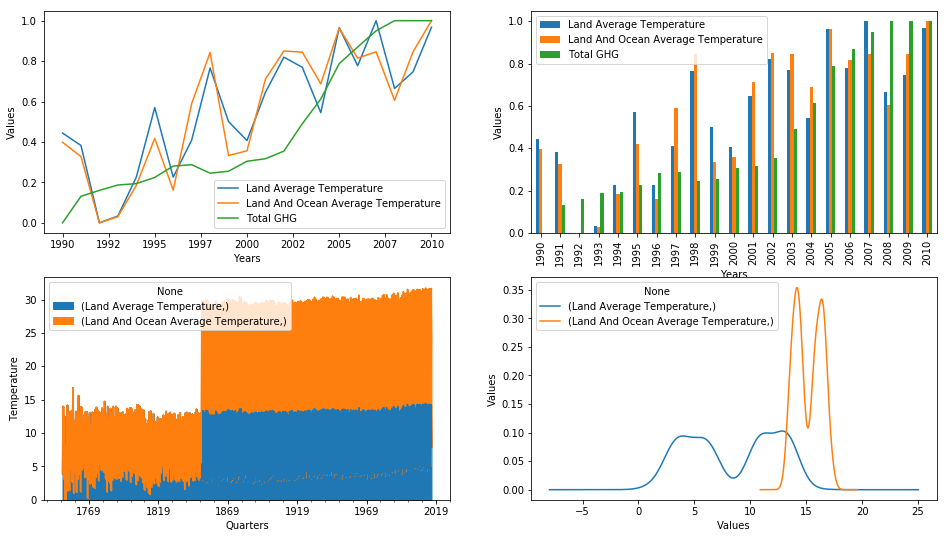

In [5]:
from matplotlib import pyplot as plt
from matplotlib import ticker
%matplotlib inline

# 定义子图
fig, axes = plt.subplots(nrows=2, ncols=2)

# 子图 1
ax1 = df_merge_max_min.plot(
    kind='line',
    figsize=(16, 9),
    ax=axes[0, 0],
)
ax1.set_xlabel('Years')
ax1.set_ylabel('Values')
ax1.xaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))

# 子图 2
ax2 = df_merge_max_min.plot(
    kind='bar',
    figsize=(16, 9),
    ax=axes[0, 1],
)
ax2.set_xlabel('Years')
ax2.set_ylabel('Values')

# 子图 3
ax3 = df_gt_resample_Q.plot(
    kind='area',
    figsize=(16, 9),
    ax=axes[1, 0],
)
ax3.set_xlabel('Quarters')
ax3.set_ylabel('Temperature')

# 子图 4
ax4 = df_gt_resample_Q.plot(
    kind='kde',
    figsize=(16, 9),
    ax=axes[1, 1],
)
ax4.set_xlabel('Values')
ax4.set_ylabel('Values')